<a href="https://colab.research.google.com/github/ansh90378/Income-prediction/blob/main/Income_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Income Prediction

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('/content/drive/MyDrive/Income Prediction/Train.csv')

In [ ]:
df.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [ ]:
df.isnull().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

In [ ]:
df = df.drop(['education_institute'], axis=1)
df = df.drop(['race', 'unemployment_reason'], axis=1)
df = df.drop(['is_hispanic'], axis=1)
df = df.drop(['old_residence_state', 'old_residence_reg'], axis=1)
df = df.drop(['migration_code_change_in_msa', 'migration_code_move_within_reg', 'migration_code_change_in_reg'], axis=1)
df = df.drop(['residence_1_year_ago', 'migration_prev_sunbelt', 'veterans_admin_questionnaire', 'under_18_family', 'occupation_code_main', 'is_labor_union', 'class'], axis=1)
df = df.drop(['ID'], axis=1)


In [ ]:
'''from sklearn.preprocessing import LabelEncoder

#create a label encode class
le = LabelEncoder()
'''

df_encoded = pd.get_dummies(df, columns=['country_of_birth_mother', 'country_of_birth_father', 'country_of_birth_own', 'citizenship', 'employment_commitment', 'marital_status', 'education', 'gender', 'industry_code_main', 'household_stat', 'household_summary', 'tax_status'])


In [ ]:
df_encoded.head(10)

,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,...,household_summary_ Householder,household_summary_ Nonrelative of householder,household_summary_ Other relative of householder,household_summary_ Spouse of householder,tax_status_ Head of household,tax_status_ Joint both 65+,tax_status_ Joint both under 65,tax_status_ Joint one under 65 & one 65+,tax_status_ Nonfiler,tax_status_ Single
0,79,0,0,52,0,0,2,2,0,0,...,1,0,0,0,1,0,0,0,0,0
1,65,0,0,0,0,0,0,2,0,0,...,1,0,0,0,0,0,0,0,0,1
2,21,0,500,15,41,26,4,2,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,70,0,0,0,0,0,0,2,0,0,...,0,0,0,1,0,1,0,0,0,0
5,45,0,825,52,33,31,6,2,0,0,...,1,0,0,0,0,0,1,0,0,0
6,53,0,0,52,33,2,6,2,0,0,...,0,0,0,1,0,0,1,0,0,0
7,22,0,0,52,35,17,1,2,0,0,...,0,0,0,1,0,0,1,0,0,0
8,73,0,0,1,0,0,3,2,0,0,...,0,0,0,1,0,1,0,0,0,0
9,22,0,0,48,22,36,3,2,0,0,...,0,0,0,0,0,0,1,0,0,0


<Figure size 800x600 with 0 Axes>

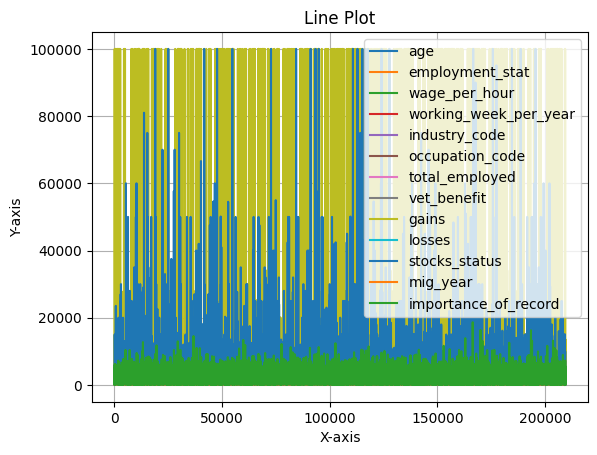

In [ ]:
plt.figure(figsize=(8, 6))
df.plot(kind='line')
plt.title('Line Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

In [ ]:
# Training Data
X = df_encoded.drop(['income_above_limit'], axis=1)  # Features
y = df_encoded['income_above_limit']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Training set (X) shape:", X_train.shape)
print("Training set (y) shape:", y_train.shape)
print("Testing set (X) shape:", X_test.shape)
print("Testing set (y) shape:", y_test.shape)


Training set (X) shape: (167599, 257)
Training set (y) shape: (167599,)
Testing set (X) shape: (41900, 257)
Testing set (y) shape: (41900,)


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier model
model1 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model1.fit(X_train, y_train)

# Make predictions on the testing data
predictions1 = model1.predict(X_test)

# Evaluate the model
accuracy1 = accuracy_score(y_test, predictions1)
report1 = classification_report(y_test, predictions1)

print("Accuracy:", accuracy1)
print("Classification Report:")
print(report1)

Accuracy: 0.954964200477327
Classification Report:
              precision    recall  f1-score   support

 Above limit       0.75      0.42      0.54      2622
 Below limit       0.96      0.99      0.98     39278

    accuracy                           0.95     41900
   macro avg       0.86      0.71      0.76     41900
weighted avg       0.95      0.95      0.95     41900



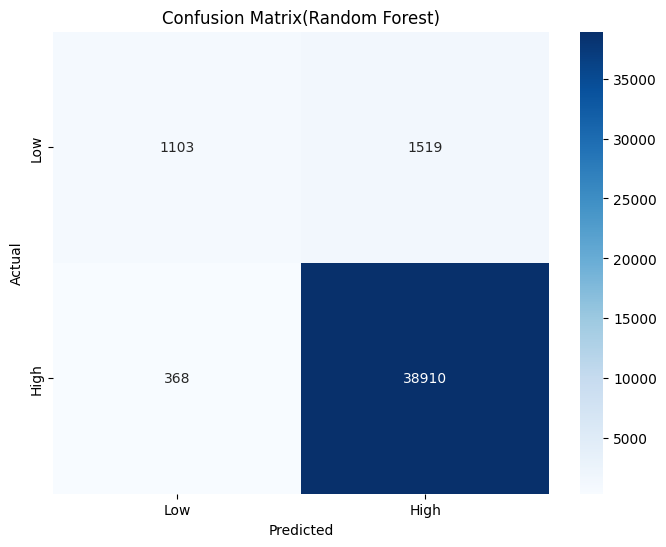

In [ ]:
# Calculate confusion matrix for Random Forest
cm1 = confusion_matrix(y_test, predictions1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, cmap='Blues', fmt='g', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix(Random Forest)')
plt.show()


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression()

# Train the model on the training data
model2.fit(X_train, y_train)

# Make predictions on the testing data
predictions2 = model2.predict(X_test)

# Evaluate the model
accuracy2 = accuracy_score(y_test, predictions2)
report2 = classification_report(y_test, predictions2)

print("Accuracy:", accuracy2)
print("Classification Report:")
print(report2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9459427207637231
Classification Report:
              precision    recall  f1-score   support

 Above limit       0.74      0.21      0.33      2622
 Below limit       0.95      0.99      0.97     39278

    accuracy                           0.95     41900
   macro avg       0.84      0.60      0.65     41900
weighted avg       0.94      0.95      0.93     41900



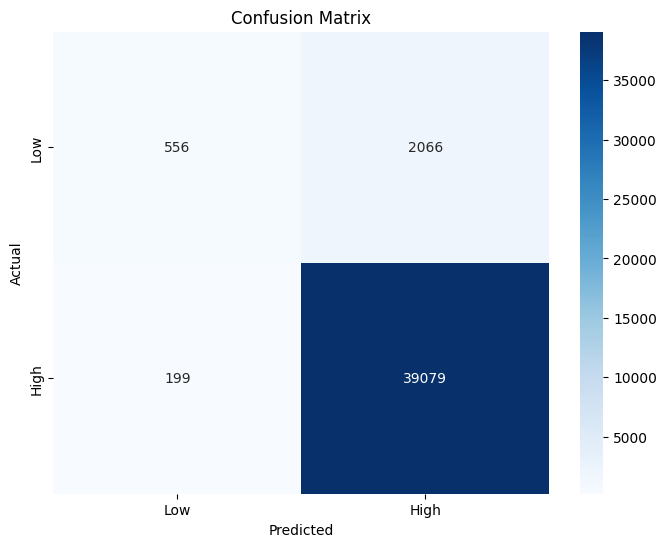

In [ ]:
# Calculate confusion matrix for Logistic Regression
cm2 = confusion_matrix(y_test, predictions2)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, cmap='Blues', fmt='g', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes classifier model
model3 = GaussianNB()

# Train the model on the training data
model3.fit(X_train, y_train)

# Make predictions on the testing data
predictions3 = model3.predict(X_test)

# Evaluate the model
accuracy3 = accuracy_score(y_test, predictions3)
report3 = classification_report(y_test, predictions3)

print("Accuracy:", accuracy3)
print("Classification Report:")
print(report3)

Accuracy: 0.7299761336515513
Classification Report:
              precision    recall  f1-score   support

 Above limit       0.18      0.92      0.30      2622
 Below limit       0.99      0.72      0.83     39278

    accuracy                           0.73     41900
   macro avg       0.59      0.82      0.57     41900
weighted avg       0.94      0.73      0.80     41900



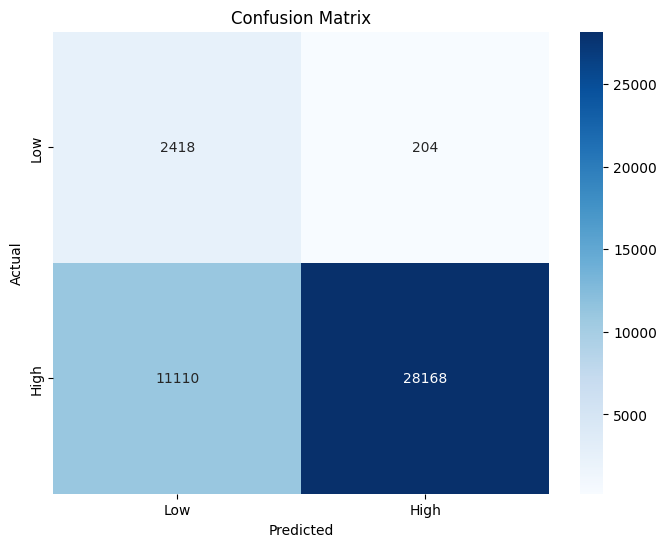

In [ ]:
# Calculate confusion matrix for Gaussian Naive Bayes
cm3 = confusion_matrix(y_test, predictions3)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, cmap='Blues', fmt='g', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier model
model4 = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
model4.fit(X_train, y_train)

# Make predictions on the testing data
predictions4 = model4.predict(X_test)

# Evaluate the model
accuracy4 = accuracy_score(y_test, predictions4)
report4 = classification_report(y_test, predictions4)

print("Accuracy:", accuracy4)
print("Classification Report:")
print(report4)

Accuracy: 0.9402625298329356
Classification Report:
              precision    recall  f1-score   support

 Above limit       0.54      0.28      0.37      2622
 Below limit       0.95      0.98      0.97     39278

    accuracy                           0.94     41900
   macro avg       0.75      0.63      0.67     41900
weighted avg       0.93      0.94      0.93     41900



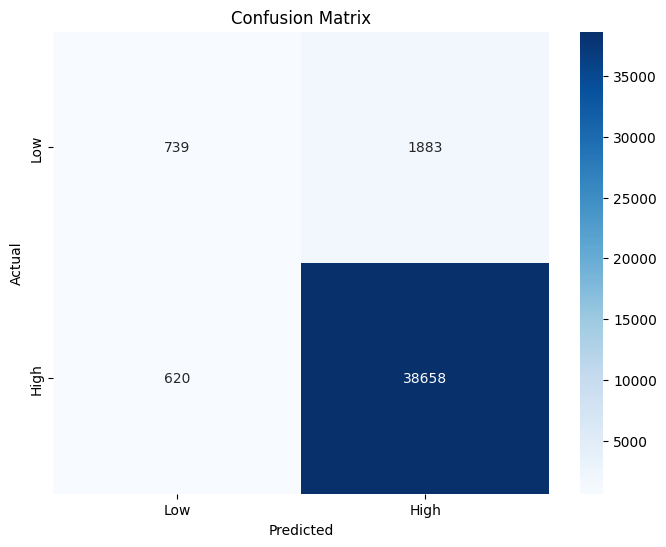

In [ ]:
# Calculate confusion matrix for KNN
cm4 = confusion_matrix(y_test, predictions4)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm4, annot=True, cmap='Blues', fmt='g', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
